# Linear Regression with TF2.0
<a href="https://colab.research.google.com/github/kbantoec/deep_learning/blob/master/tf2/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from numpy.core import ndarray, float32
import matplotlib.pyplot as plt

In [2]:
print(f"{tf.__name__}=={tf.__version__}")
print(f"{keras.__name__}=={keras.__version__}")

tensorflow==2.3.0
tensorflow.keras==2.4.0


In [3]:
!python --version

Python 3.6.9


Run `!pip freeze > requirements.txt` to create the requirement file.

In [4]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-09-25 13:10:34--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-09-25 13:10:34 (39.3 MB/s) - ‘moore.csv.2’ saved [2302/2302]



# Part 1. Linear Regression of the Moore's Law

In [5]:
data = pd.read_csv('moore.csv', header=None)
data.head(3)

,0,1
0,1971,2300
1,1972,3500
2,1973,2500


In [6]:
X: ndarray = data[0].to_numpy().reshape(-1, 1)
y: ndarray = data[1].to_numpy()
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (162, 1), y shape: (162,)


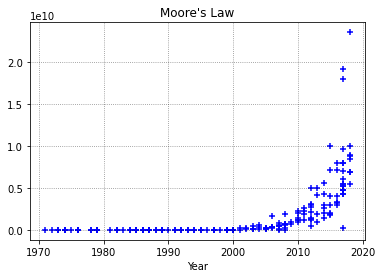

In [7]:
plt.scatter(X, y, marker='+', c='b')
plt.grid(True, c='k', ls=':', alpha=0.5)
plt.title('Moore\'s Law')
plt.xlabel('Year')
plt.show()

As expected, we can notice that the plot above exhibits exponential growth, which is the Moore's law.

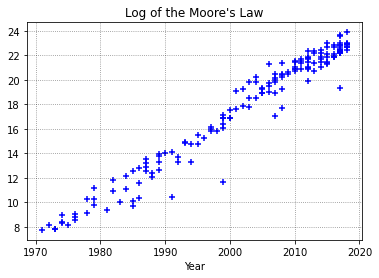

In [8]:
log_y = np.log(y)
plt.scatter(X, log_y, marker='+', c='b')
plt.grid(True, c='k', ls=':', alpha=0.5)
plt.title('Log of the Moore\'s Law')
plt.xlabel('Year')
plt.show()

Let's center the `X` data such that the values are not too large. We could have scaled `X`, but the we would have had to reverse the transformation later.

In [9]:
X_centered = X - X.mean()

We can now create our TensorFlow model. We'll need an input layer and a dense layer. The input has dimensionaliy 1, as does the output. Remember also that for linear regression, there is no activation function.

In [10]:
model = Sequential()
model.add(Input((1, )))
model.add(Dense(1))

In [11]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='mse')

In [12]:
def schedule(epoch, lr):
  '''Learning rate scheduler'''
  if epoch >= 50:
    return 0.0001
  return 0.001

In [13]:
scheduler = keras.callbacks.LearningRateScheduler(schedule)

In [14]:
r = model.fit(X_centered, log_y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 319.8759
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 320.0734
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 322.5036
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 215.0333
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 162.5668
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 128.7849
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 92.1241
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 81.5726
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 61.3574
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 86.8624
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 44.5719
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 20.8174
Epoch 13/200
6/6 [=========================

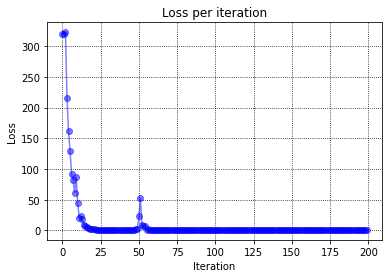

In [15]:
plt.plot(r.history['loss'], marker='o', c='b', alpha=0.5)
plt.title('Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(c='k', ls=':')
plt.show()

It looks like the loss has converged.

Now, let's get to train the weights of the model. 

First, we have to access the relevant layer.

With `model.layers` we will only see the `Dense` layer, and not the `Input` layer.

In [16]:
dense_layer = model.layers[0]
dense_layer.get_weights()

[array([[0.3197876]], dtype=float32), array([17.764189], dtype=float32)]

In [17]:
a: float32 = dense_layer.get_weights()[0][0, 0]
a

0.3197876

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [18]:
print("Time to double:", np.log(2) / a)

Time to double: 2.167523689347326


If you know the analytical solution:

In [23]:
X_ = np.array(X_centered).flatten()
Y = np.array(log_y)
denominator = X_.dot(X_) - X_.mean() * X_.sum()
a_ = ( X_.dot(Y) - Y.mean() * X_.sum() ) / denominator
b = ( Y.mean() * X_.dot(X_) - X_.mean() * X_.dot(Y) ) / denominator
print(a_, b)
print("Time to double:", np.log(2) / a_)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


# Part 2. Making predictions

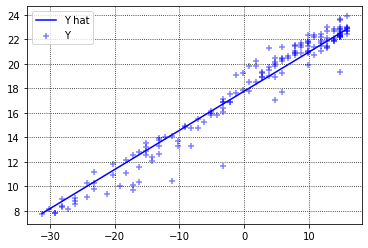

In [29]:
y_hat = model.predict(X_centered).flatten()
plt.scatter(X_centered, log_y, c='b', marker='+', alpha=0.5, label='Y')
plt.plot(X_centered, y_hat, c='b', label='Y hat')
plt.grid(c='k', ls=':')
plt.legend()
plt.show()

Analytically:

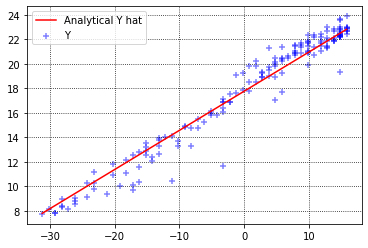

In [30]:
w, bias = dense_layer.get_weights()

y_hat_2 = (X_centered.dot(w) + bias).flatten()

plt.scatter(X_centered, log_y, c='b', marker='+', alpha=0.5, label='Y')
plt.plot(X_centered, y_hat_2, c='r', label='Analytical Y hat')
plt.grid(c='k', ls=':')
plt.legend()
plt.show()

In [31]:
np.allclose(y_hat, y_hat_2)

True

`True` if two arrays, `y_hat` and `y_hat_2` are element-wise equal within a tolerance.